## Imports e arquivos

In [670]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Configure como true para rodar o treinamento
shouldTrain = False

# Ler arquivo, criar dataset convertendo para número as strings
df = pd.read_csv('https://raw.githubusercontent.com/NiceColors/I.A-UFRRJ-Trabalho-Final/main/dados.csv')
df = df.replace('\.', '', regex=True)
df = df.apply(pd.to_numeric)

# Descrevendo dados

In [671]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62.473,9.029,53.952,45.770,43.731,2.512,113,29.403,80.609,63.724,71,158,158,158,1
1,98.373,56.367,-1.000,22.473,68.861,563.000,139,114.136,129.245,33.859,88,190,155,119,1
2,787.000,93.203,109.460,105.912,551.000,3.258,127,11.412,300.882,326.000,80,145,120,72,1
3,4.590,76.386,23.087,46.211,3.213,2.276,140,80.428,71.589,533.000,88,154,137,109,1
4,84.631,30.822,25.158,12.022,59.242,2.167,143,43.401,22.692,88.707,90,193,193,193,1


In [672]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
V1,1.000000,0.025891,-0.038678,-0.044414,0.628780,0.056344,0.124016,-0.047920,-0.110712,0.392835,0.124517,0.188474,0.050440,0.092609,0.240146
V2,0.025891,1.000000,0.173908,0.331074,-0.010147,0.102850,0.169591,0.400115,-0.234550,0.071003,0.171964,0.210250,0.364034,0.374762,-0.217362
V3,-0.038678,0.173908,1.000000,0.310435,-0.025864,-0.053347,0.211618,0.013041,0.110894,-0.047783,0.212791,0.006974,0.234777,0.212384,-0.103204
V4,-0.044414,0.331074,0.310435,1.000000,-0.061307,-0.094662,0.041391,0.360440,0.050698,0.000301,0.042647,0.118624,0.336241,0.349448,-0.221259
V5,0.628780,-0.010147,-0.025864,-0.061307,1.000000,0.002581,0.100569,0.138542,-0.072514,0.445610,0.100046,0.116930,-0.048428,-0.002142,0.257635
V6,0.056344,0.102850,-0.053347,-0.094662,0.002581,1.000000,-0.035182,0.080979,-0.031143,0.043601,-0.035407,-0.057850,-0.000490,0.017254,0.038240
V7,0.124016,0.169591,0.211618,0.041391,0.100569,-0.035182,1.000000,0.169858,-0.166086,0.162127,0.999544,0.113559,0.263767,0.242400,-0.025943
V8,-0.047920,0.400115,0.013041,0.360440,0.138542,0.080979,0.169858,1.000000,-0.275383,0.170366,0.172159,0.079025,0.270793,0.271292,-0.158176
V9,-0.110712,-0.234550,0.110894,0.050698,-0.072514,-0.031143,-0.166086,-0.275383,1.000000,-0.103802,-0.170336,-0.095787,-0.524396,-0.601564,0.026487
V10,0.392835,0.071003,-0.047783,0.000301,0.445610,0.043601,0.162127,0.170366,-0.103802,1.000000,0.161363,0.274099,0.014185,0.066534,0.254998


In [673]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,1.620000e+02,162.000000,162.000000,162.000000
mean,83.792259,76.310117,59.237340,90.521340,78.400327,77.124679,118.555556,104.605395,169.571889,87.146864,74.685185,2.277213e+04,131.765432,97.030864,0.648148
std,158.784960,184.741041,103.331867,108.261343,160.278710,137.160369,14.660548,218.454154,114.997743,175.473956,9.242403,2.039744e+05,44.755727,54.232926,0.479029
min,0.000000,-2.000000,-1.000000,1.366000,1.000000,1.000000,86.000000,1.041000,-1.000000,1.237000,54.000000,2.500000e+01,35.000000,20.000000,0.000000
25%,10.618750,10.797000,20.820500,32.677500,9.756750,13.002750,109.000000,4.153500,80.646250,8.582500,69.000000,8.200000e+01,106.000000,60.250000,0.000000
50%,23.470500,30.726000,42.714000,60.769500,17.223500,47.620500,117.000000,10.886000,163.662000,18.760500,74.000000,9.600000e+01,117.000000,71.000000,1.000000
75%,76.931000,47.439750,63.596750,93.693000,64.295500,89.758250,126.750000,39.201500,258.358250,75.922750,79.750000,1.612500e+02,161.750000,129.000000,1.000000
max,999.000000,999.000000,923.000000,661.000000,915.000000,989.000000,154.000000,961.000000,739.825000,948.705000,97.000000,1.990000e+06,240.000000,237.000000,1.000000


# Tirando outliers
Usando quartil

In [674]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

nonOutlierList = Remove_Outlier_Indices(df)

dfSubset = df[nonOutlierList]

dfSubset = dfSubset.dropna()

dfSubset


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,62.473,9.029,53.952,45.770,43.731,2.512,113.0,29.403,80.609,63.724,71.0,158.0,158,158.0,1
4,84.631,30.822,25.158,12.022,59.242,2.167,143.0,43.401,22.692,88.707,90.0,193.0,193,193.0,1
5,169.281,33.454,56.726,24.891,118.497,1.588,133.0,25.615,92.582,167.743,84.0,210.0,169,138.0,1
6,52.783,22.091,43.572,43.604,36.948,1.750,120.0,36.052,92.582,38.135,76.0,164.0,147,110.0,1
8,37.199,2.042,28.813,36.207,26.039,1.939,104.0,3.499,66.845,35.856,66.0,155.0,139,112.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,17.960,38.657,41.602,78.185,12.572,106.650,117.0,13.310,242.150,18.130,74.0,79.0,97,63.0,0
158,2.418,5.151,8.552,19.830,1.693,14.374,108.0,1.921,37.343,11.061,68.0,77.0,87,91.0,0
159,5.736,7.147,16.064,13.879,4.015,7.682,120.0,3.391,37.343,3.703,76.0,105.0,128,66.0,0
160,5.600,13.967,13.290,13.161,3.920,4.307,130.0,81.000,50.146,98.000,82.0,121.0,144,56.0,0


# Normalizando
Utilizando max min

In [675]:
normalized_df=(dfSubset-dfSubset.min())/(dfSubset.max()-dfSubset.min())
normalized_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0.365300,0.110957,0.428872,0.243312,0.363677,0.008243,0.389831,0.354707,0.264415,0.375284,0.378378,0.701149,0.72500,0.766871,1.0
4,0.496972,0.330205,0.177714,0.051795,0.495689,0.005893,0.898305,0.529772,0.048917,0.525326,0.891892,0.902299,0.94375,0.981595,1.0
5,1.000000,0.356684,0.453068,0.124825,1.000000,0.001948,0.728814,0.307333,0.308965,1.000000,0.729730,1.000000,0.79375,0.644172,1.0
6,0.307717,0.242367,0.338331,0.231020,0.305948,0.003052,0.508475,0.437862,0.308965,0.221602,0.513514,0.735632,0.65625,0.472393,1.0
8,0.215110,0.040664,0.209595,0.189043,0.213103,0.004340,0.237288,0.030741,0.213202,0.207914,0.243243,0.683908,0.60625,0.484663,1.0


In [676]:
normalized_df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
V1,1.000000,-0.314093,-0.142666,-0.314381,0.999999,-0.320966,-0.018534,0.094684,-0.488246,0.940265,-0.023624,0.826013,0.825401,0.846767,0.319875
V2,-0.314093,1.000000,0.508109,0.059485,-0.314449,0.455912,0.519175,0.108149,0.598303,-0.420065,0.516924,-0.316291,-0.283845,-0.430554,-0.392884
V3,-0.142666,0.508109,1.000000,0.283902,-0.142323,0.046209,0.217835,-0.097271,0.522076,-0.185483,0.220811,-0.056495,-0.030002,-0.153143,-0.074469
V4,-0.314381,0.059485,0.283902,1.000000,-0.313969,0.021606,-0.626935,-0.238273,0.659988,-0.355589,-0.628169,-0.430032,-0.280735,-0.363509,-0.161854
V5,0.999999,-0.314449,-0.142323,-0.313969,1.000000,-0.320942,-0.018685,0.094307,-0.487973,0.940356,-0.023775,0.826102,0.825472,0.846960,0.320099
V6,-0.320966,0.455912,0.046209,0.021606,-0.320942,1.000000,0.302054,-0.161879,0.635766,-0.406698,0.295899,-0.609333,-0.579273,-0.491188,-0.378613
V7,-0.018534,0.519175,0.217835,-0.626935,-0.018685,0.302054,1.000000,0.246723,-0.020392,-0.033419,0.999330,0.045488,-0.066069,-0.067747,-0.032899
V8,0.094684,0.108149,-0.097271,-0.238273,0.094307,-0.161879,0.246723,1.000000,-0.299026,0.212061,0.249048,0.204946,0.141651,0.111442,0.019363
V9,-0.488246,0.598303,0.522076,0.659988,-0.487973,0.635766,-0.020392,-0.299026,1.000000,-0.591056,-0.024936,-0.664553,-0.537628,-0.627223,-0.398129
V10,0.940265,-0.420065,-0.185483,-0.355589,0.940356,-0.406698,-0.033419,0.212061,-0.591056,1.000000,-0.036353,0.845980,0.841652,0.878246,0.327340


# Separar classes 0 e 1 da coluna v15


In [677]:
normalized_df0 = normalized_df[normalized_df['V15'] == 0]
normalized_df0.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
109,0.047540,0.623749,0.000000,0.000000,0.042554,0.003747,0.355932,0.574782,0.000000,0.040617,0.351351,0.195402,0.40625,0.079755,0.0
110,0.096119,0.343152,0.502037,0.525940,0.093815,0.507906,0.389831,0.300466,0.874907,0.072472,0.378378,0.287356,0.36875,0.202454,0.0
111,0.214130,0.357378,0.332269,0.391643,0.212125,0.656793,0.457627,0.226391,0.832958,0.175753,0.459459,0.293103,0.41875,0.239264,0.0
112,0.210683,0.351694,0.343425,0.438109,0.208669,0.600099,0.423729,0.161920,0.851655,0.176534,0.405405,0.310345,0.43750,0.226994,0.0
113,0.104230,0.221411,0.291692,1.000000,0.101943,0.176239,0.101695,0.052177,0.956787,0.059541,0.081081,0.241379,0.40000,0.159509,0.0


In [678]:
normalized_df1 = normalized_df[normalized_df['V15'] == 1]
normalized_df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15
0,0.365300,0.110957,0.428872,0.243312,0.363677,0.008243,0.389831,0.354707,0.264415,0.375284,0.378378,0.701149,0.72500,0.766871,1.0
4,0.496972,0.330205,0.177714,0.051795,0.495689,0.005893,0.898305,0.529772,0.048917,0.525326,0.891892,0.902299,0.94375,0.981595,1.0
5,1.000000,0.356684,0.453068,0.124825,1.000000,0.001948,0.728814,0.307333,0.308965,1.000000,0.729730,1.000000,0.79375,0.644172,1.0
6,0.307717,0.242367,0.338331,0.231020,0.305948,0.003052,0.508475,0.437862,0.308965,0.221602,0.513514,0.735632,0.65625,0.472393,1.0
8,0.215110,0.040664,0.209595,0.189043,0.213103,0.004340,0.237288,0.030741,0.213202,0.207914,0.243243,0.683908,0.60625,0.484663,1.0


# Plotando distribuição normal (gauss)

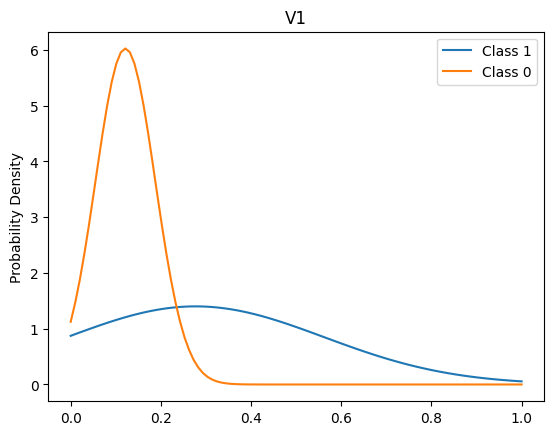

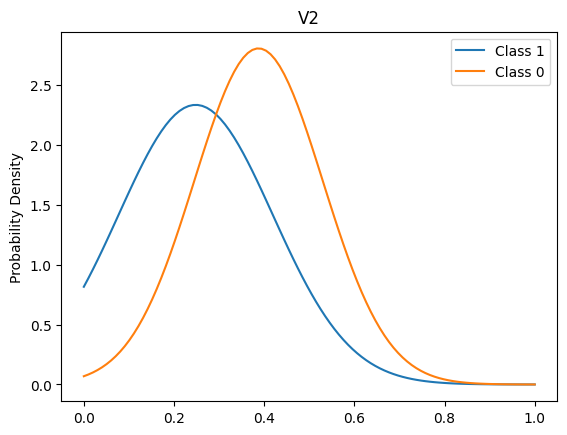

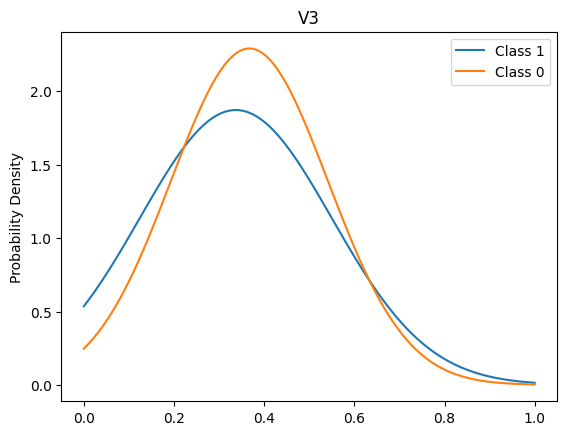

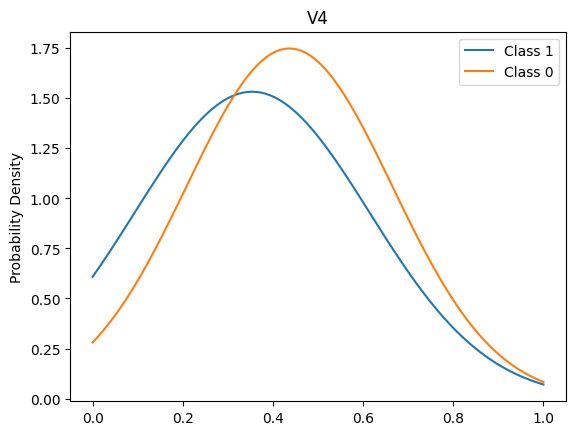

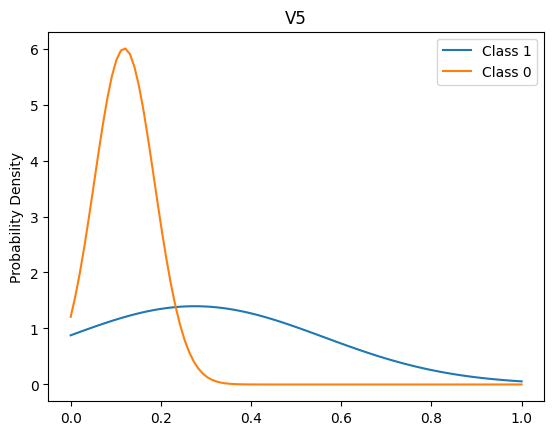

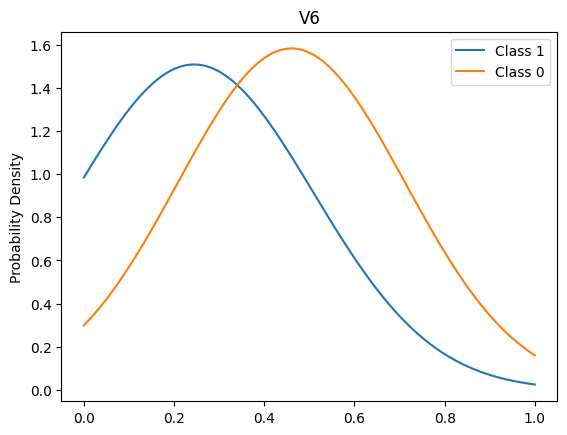

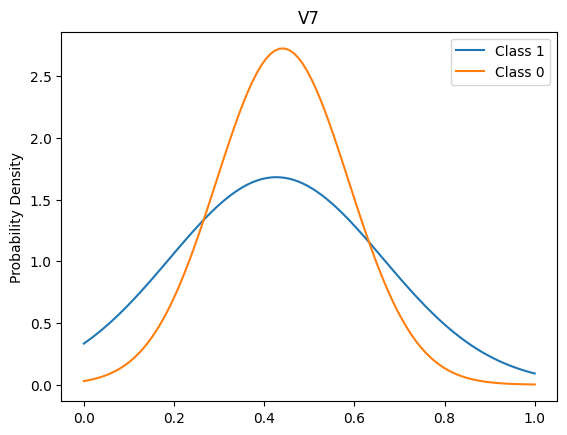

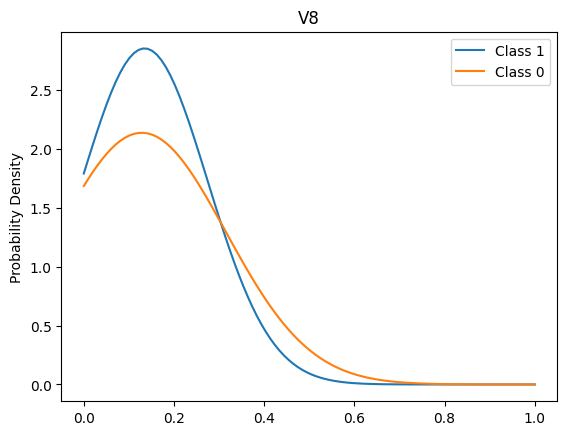

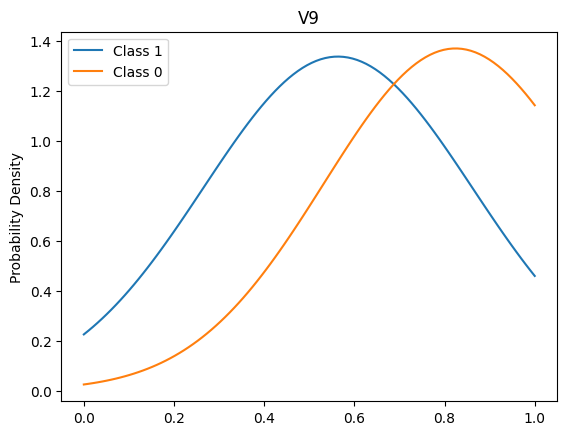

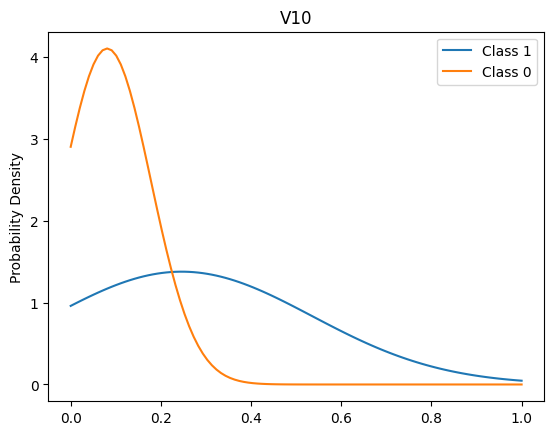

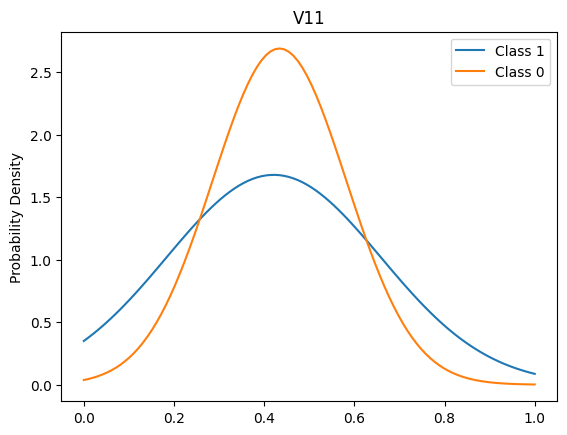

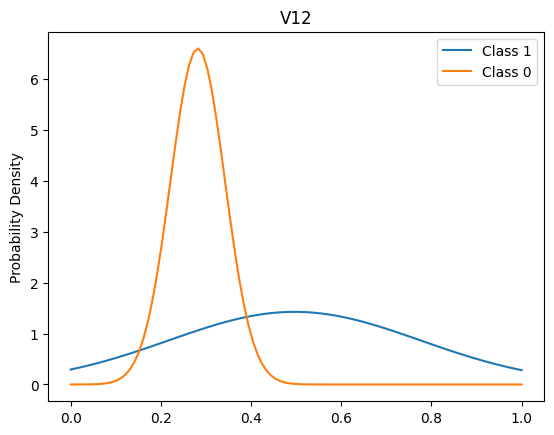

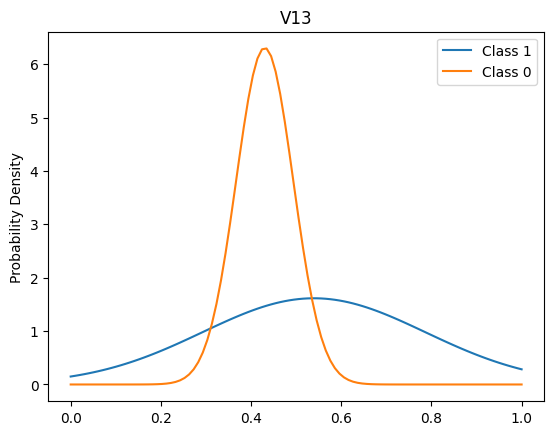

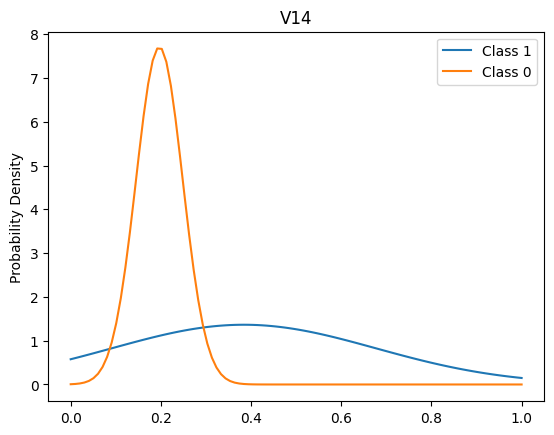

In [679]:
columns = list(normalized_df1.columns.values)

for column in columns:
  if(column == 'V15'):
    continue

  fig, ax = plt.subplots()
  ax.set_title(column)

  mean1 = normalized_df1[column].mean()
  std1 = normalized_df1[column].std()

  mean0 = normalized_df0[column].mean()
  std0 = normalized_df0[column].std()

  x = np.linspace(min(normalized_df1[column].min(), normalized_df0[column].min()),
                  max(normalized_df1[column].max(), normalized_df0[column].max()), 100)

  ax.plot(x, norm.pdf(x, mean1, std1))

  ax.plot(x, norm.pdf(x, mean0, std0))
  ax.legend(["Class 1", "Class 0"])

  ax.set_ylabel('Probability Density')



# Escolhendo colunas
Foram removidas as v3, v4, v5, v7, v8, v10, v11, v13, v14

In [680]:
dropped_df = df
dropped_df = dropped_df.drop('V3', axis=1) # pouca diferença entre classes
dropped_df = dropped_df.drop('V4', axis=1) # pouca diferença entre classes
dropped_df = dropped_df.drop('V5', axis=1) # parecido com v1 (0.999999)
dropped_df = dropped_df.drop('V7', axis=1) # pouca diferença entre classes
dropped_df = dropped_df.drop('V8', axis=1) # pouca diferença entre classes
dropped_df = dropped_df.drop('V10', axis=1) # parecido com v1 (0.940265)
dropped_df = dropped_df.drop('V11', axis=1) # pouca diferença entre classes
dropped_df = dropped_df.drop('V13', axis=1) # parecido com v1 (0.825401)
dropped_df = dropped_df.drop('V14', axis=1) # parecido com v1 (0.846767)

dropped_df

,V1,V2,V6,V9,V12,V15
0,62.473,9.029,2.512,80.609,158,1
1,98.373,56.367,563.000,129.245,190,1
2,787.000,93.203,3.258,300.882,145,1
3,4.590,76.386,2.276,71.589,154,1
4,84.631,30.822,2.167,22.692,193,1
...,...,...,...,...,...,...
157,739.000,10.052,6.041,47.897,88,0
158,2.418,5.151,14.374,37.343,77,0
159,5.736,7.147,7.682,37.343,105,0
160,5.600,13.967,4.307,50.146,121,0


# MLP

In [681]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,  ConfusionMatrixDisplay
import warnings
from sklearn.exceptions import ConvergenceWarning
import pickle
import os
import time
import csv 

In [695]:

warnings.filterwarnings("ignore", category=ConvergenceWarning)

target = 'V15'
X = dropped_df.drop(columns=[target])
y = dropped_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24122)


In [683]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [684]:
if(shouldTrain):
  firstLayerMax = 101
  secondLayerMax = 51

  mlpLists = []
  trainingValues = [0.1, 0.01, 0.001, 0.0001, 0.0001]
  momentumValues = [0.1, 0.2, 0.5, 0.9, 0.95, 0.99]


  for batch in range(0, 20):
    folder = './mlp/' + str(batch)  + '/'
    os.makedirs(folder)

    for firstLayerValue in range(1, firstLayerMax, 10):
      for secondLayerValue in range(1, secondLayerMax, 10):
        for trainingValue in trainingValues:
          for momentum in momentumValues: 
            mlp = MLPClassifier(
              hidden_layer_sizes=(firstLayerValue, secondLayerValue), 
              learning_rate_init=trainingValue,
              momentum=momentum
            )


            mlp.fit(X_train, y_train)
            # Make predictions on the test data
            y_pred = mlp.predict(X_test)

            # Calculate accuracy score
            accuracy = accuracy_score(y_test, y_pred)

            csvFilename = 'result.csv'
            mlpFilename = folder + str(firstLayerValue) + ':' + str(secondLayerValue) + '-' + str(trainingValue) + '-' + str(momentum)
            
            curMlp = {}
            curMlp['accuracy'] = accuracy
            curMlp['firstLayer'] = firstLayerValue
            curMlp['secondLayer'] = secondLayerValue
            curMlp['traning'] = trainingValue
            curMlp['momentum'] = momentum
            curMlp['name'] = mlpFilename
            mlpLists.append(curMlp)
            
            with open(mlpFilename, 'wb') as file:
              pickle.dump(mlp, file, protocol=pickle.HIGHEST_PROTOCOL)

    with open(folder + 'result.csv', mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=['accuracy', 'firstLayer', 'secondLayer', 'traning', 'momentum', 'name'])

        # Write the header to the CSV file
        writer.writeheader()

        # Write the rows to the CSV file
        writer.writerows(mlpLists)


# Analisando resultados

In [685]:
resultados_df_list = []

base_dir = "./mlp/nonscaled"
num_files = 20
output_file = "result.csv"

for i in range(num_files):
    file_path = os.path.join(base_dir, str(i), output_file)
    if os.path.exists(file_path):
      tempdf = pd.read_csv(file_path)
      tempdf = tempdf[['accuracy']]
      tempdf['accuracy'] = tempdf['accuracy'].astype(float)
      tempdf.rename(columns={'accuracy': 'accuracy' + str(i)}, inplace=True)
      resultados_df_list.append(tempdf)


combined_df = pd.concat(resultados_df_list, axis=1)
combined_df = combined_df.dropna()
combined_df

combined_df['media'] = combined_df.mean(axis=1)


df_sorted = combined_df.sort_values(by='media', ascending=False)

top_10 = df_sorted.head(10)

top_10['media']

1277    0.836364
736     0.821212
1005    0.815152
973     0.813636
552     0.812121
1459    0.800000
977     0.800000
491     0.798485
883     0.798485
645     0.798485
Name: media, dtype: float64

# Recuperando os 10 melhores e vendo a matriz de confusão

In [686]:
bests = {}
for idx, row in top_10.iterrows():
  for i in range(num_files):
    value = resultados_df_list[i].iloc[idx]['accuracy' + str(i)]
    if (idx not in bests): 
      bests[idx] = {
        'value': value, 
        'i': i
      }
    elif (value > bests[idx]['value']):
      bests[idx] = {
        'value': value, 
        'i': i
      }
bests


{1277: {'value': 0.8787878787878788, 'i': 10},
 736: {'value': 0.8787878787878788, 'i': 1},
 1005: {'value': 0.8181818181818182, 'i': 1},
 973: {'value': 0.8484848484848485, 'i': 1},
 552: {'value': 0.8484848484848485, 'i': 1},
 1459: {'value': 0.8787878787878788, 'i': 1},
 977: {'value': 0.8181818181818182, 'i': 1},
 491: {'value': 0.8181818181818182, 'i': 1},
 883: {'value': 0.8787878787878788, 'i': 1},
 645: {'value': 0.8484848484848485, 'i': 10}}

In [696]:
df = pd.read_csv(base_dir + '/0/result.csv')
metrics_data = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'confusion': []
}

for key, value in bests.items():
  file_path = df.iloc[key]['name'].replace('./mlp/0' , base_dir + '/' + str(value['i']))
  with open(file_path, "rb") as f:
    model = pickle.load(f)
    y_pred = model.predict(X_test)

    metrics_data['model'].append(file_path)
    metrics_data['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics_data['precision'].append(precision_score(y_test, y_pred))
    metrics_data['recall'].append(recall_score(y_test, y_pred))
    metrics_data['f1'].append(f1_score(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    metrics_data['confusion'].append(cm)


metrics_df = pd.DataFrame(metrics_data)
metrics_df

sorted_metrics_df = metrics_df.sort_values("precision", ascending=False)
sorted_metrics_df


,model,accuracy,precision,recall,f1,confusion
0,./mlp/nonscaled/10/81:21-0.001-0.99,0.909091,0.950000,0.904762,0.926829,"[[11, 1], [2, 19]]"
1,./mlp/nonscaled/1/41:41-0.001-0.95,0.818182,0.894737,0.809524,0.850000,"[[10, 2], [4, 17]]"
6,./mlp/nonscaled/1/61:21-0.001-0.99,0.818182,0.894737,0.809524,0.850000,"[[10, 2], [4, 17]]"
9,./mlp/nonscaled/10/41:11-0.001-0.9,0.818182,0.857143,0.857143,0.857143,"[[9, 3], [3, 18]]"
8,./mlp/nonscaled/1/51:41-0.001-0.2,0.787879,0.850000,0.809524,0.829268,"[[9, 3], [4, 17]]"
3,./mlp/nonscaled/1/61:21-0.001-0.2,0.787879,0.818182,0.857143,0.837209,"[[8, 4], [3, 18]]"
7,./mlp/nonscaled/1/31:11-0.01-0.99,0.818182,0.800000,0.952381,0.869565,"[[7, 5], [1, 20]]"
2,./mlp/nonscaled/1/61:31-0.001-0.9,0.727273,0.714286,0.952381,0.816327,"[[4, 8], [1, 20]]"
5,./mlp/nonscaled/1/91:31-0.0001-0.2,0.696970,0.689655,0.952381,0.800000,"[[3, 9], [1, 20]]"
4,./mlp/nonscaled/1/31:31-0.001-0.1,0.666667,0.678571,0.904762,0.775510,"[[3, 9], [2, 19]]"


# Matriz de confusão da melhor

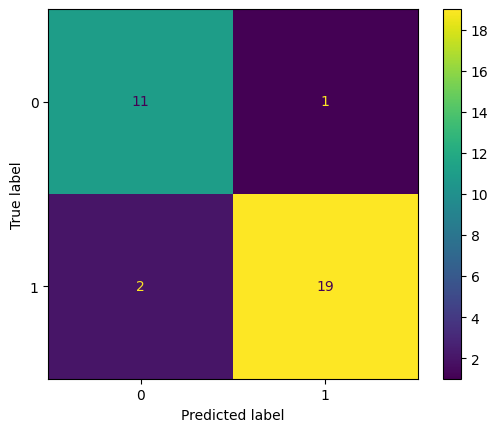

In [697]:
ConfusionMatrixDisplay(sorted_metrics_df.iloc[0]['confusion']).plot()
